In [3]:
# %reset
import numpy as np 
from mnist import MNIST
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from display_network import *

In [4]:
mntrain = MNIST('../MNIST/')
mntrain.load_training()
Xtrain_all = np.asarray(mntrain.train_images)
ytrain_all = np.array(mntrain.train_labels.tolist())

mntest = MNIST('../MNIST/')
mntest.load_testing()
Xtest_all = np.asarray(mntest.test_images)
ytest_all = np.array(mntest.test_labels.tolist())

In [8]:
def extract_data(X, y, classes):
    """
    X: numpy array, matrix of size (N, d), d is data dim
    y: numpy array, size (N, )
    cls: two lists of labels. For example: 
        cls = [[1, 4, 7], [5, 6, 8]]
    return:
        X: extracted data
        y: extracted label 
            (0 and 1, corresponding to two lists in cls)
    """
    y_res_id = np.array([])
    for i in cls[0]:
        y_res_id = np.hstack((y_res_id, np.where(y == i)[0]))
    n0 = len(y_res_id)

    for i in cls[1]:
        y_res_id = np.hstack((y_res_id, np.where(y == i)[0]))
    n1 = len(y_res_id) - n0 
    y_res_id = y_res_id.astype(int)
    X_res = X[y_res_id, :]/255.0
    y_res = np.asarray([0]*n0 + [1]*n1)
    return (X_res, y_res)

cls = [[0], [1]]
# extract data for training 
(X_train, y_train) = extract_data(Xtrain_all, ytrain_all, cls)

# data for test 
(X_test, y_test) = extract_data(Xtest_all, ytest_all, cls)

In [9]:
# train the logistic regression model 
logreg = linear_model.LogisticRegression(C=1e5) # just a big number 
logreg.fit(X_train, y_train)

# predict 
y_pred = logreg.predict(X_test)
print "Accuracy: %.2f %%" %(100*accuracy_score(y_test, y_pred.tolist()))

Accuracy: 99.95 %


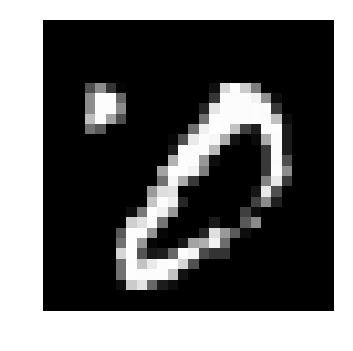

In [12]:
# display misclassified image(s)
mis = np.where((y_pred - y_test) != 0)[0]
Xmis = X_test[mis, :]

plt.axis('off')
A = display_network(Xmis.T)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.show()

In [ ]:
logreg.fit(Xtrain_all, ytrain_all)
y_pred = logreg.predict(Xtest_all)
print "Accuracy: %.2f %%" %(100*accuracy_score(ytest_all, y_pred.tolist()))